In [21]:
import numpy as np
import matplotlib.pyplot as plt
import backbone.Distributions as dist
import importlib
import numpy as np
from astroML.plotting import hist
import backbone.AstroMLmodified as AstroMLmod
import matplotlib.pyplot as plt
import matplotlib
import backbone.VISUAL as viz
import numpy as np
import backbone.Test as test
import random
from sklearn.metrics import davies_bouldin_score as davies
random.seed(42)
import math
import time as time
import pandas as pd
importlib.reload(dist)
importlib.reload(viz)
plt.rcParams.update({'font.size': 20}) 
from sklearn.utils import check_random_state
rng = check_random_state(42)
#Matplotlib settings
importlib.reload(dist)
importlib.reload(dist)
importlib.reload(AstroMLmod)

fig = plt.figure(dpi = 300)
plt.style.use("default")
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 20})

cov_range = []

<Figure size 640x480 with 0 Axes>

<Figure size 1920x1440 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

# Gaussian Zoo generator

## The 2PCF as when varying cluster cohession

0.9108502783779941
Computing background and RR distributions: will be slower
Background factor 1
Number of valid bins:  99
Repley's K:  (np.float64(1.3994929041139808), np.float64(0.0))
Plotting


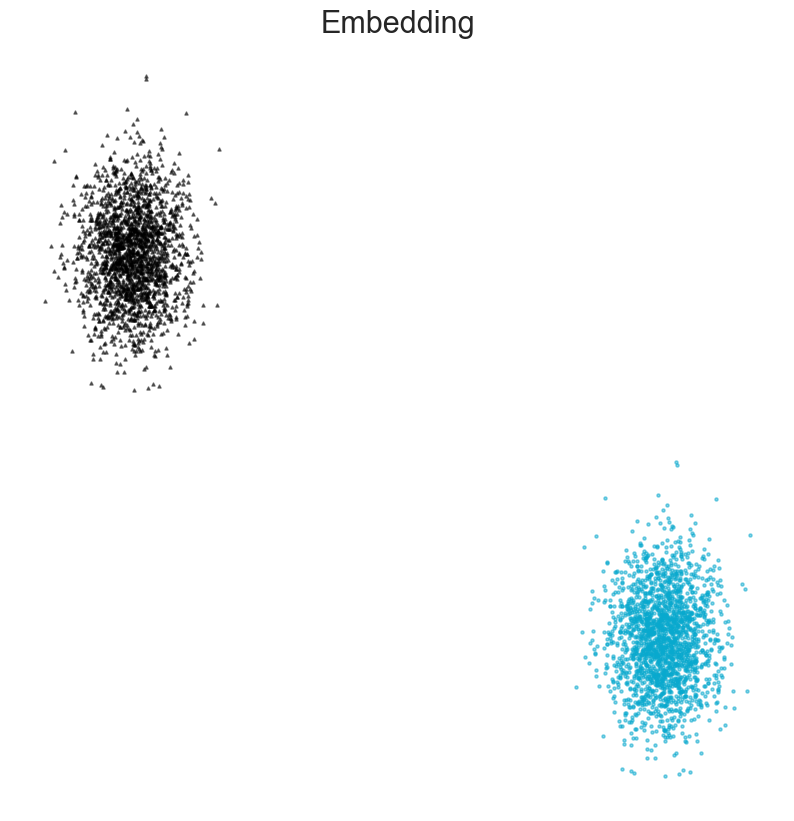

0.8812069014242601
Computing background and RR distributions: will be slower
Background factor 1
Number of valid bins:  99
Repley's K:  (np.float64(1.3499414965120435), np.float64(0.0))
Plotting


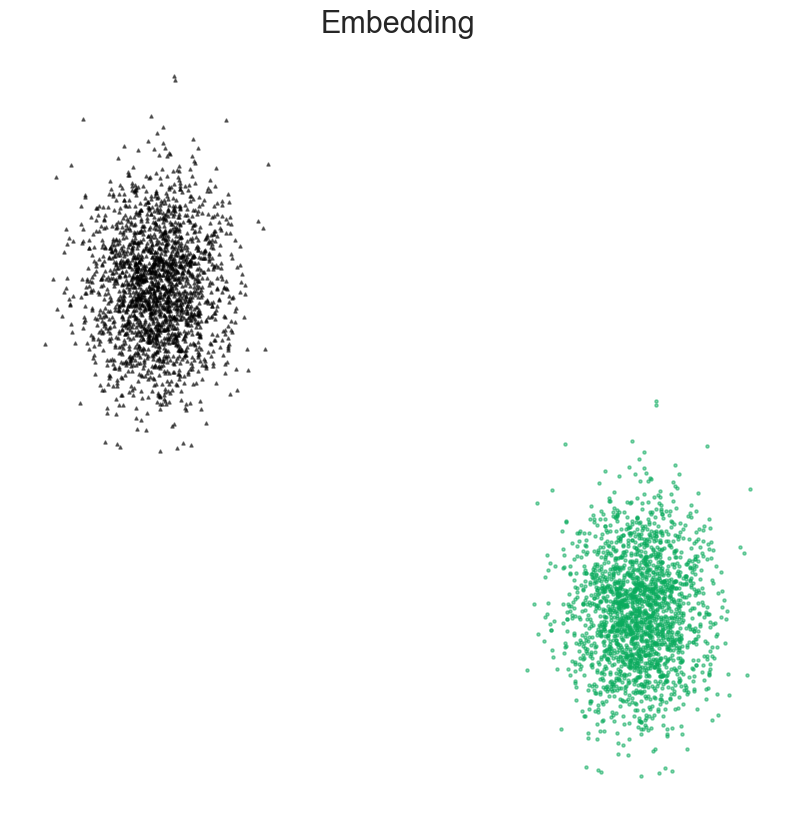

0.8424477291572955
Computing background and RR distributions: will be slower
Background factor 1
Number of valid bins:  99
Repley's K:  (np.float64(1.3095142182869555), np.float64(0.0))
Plotting


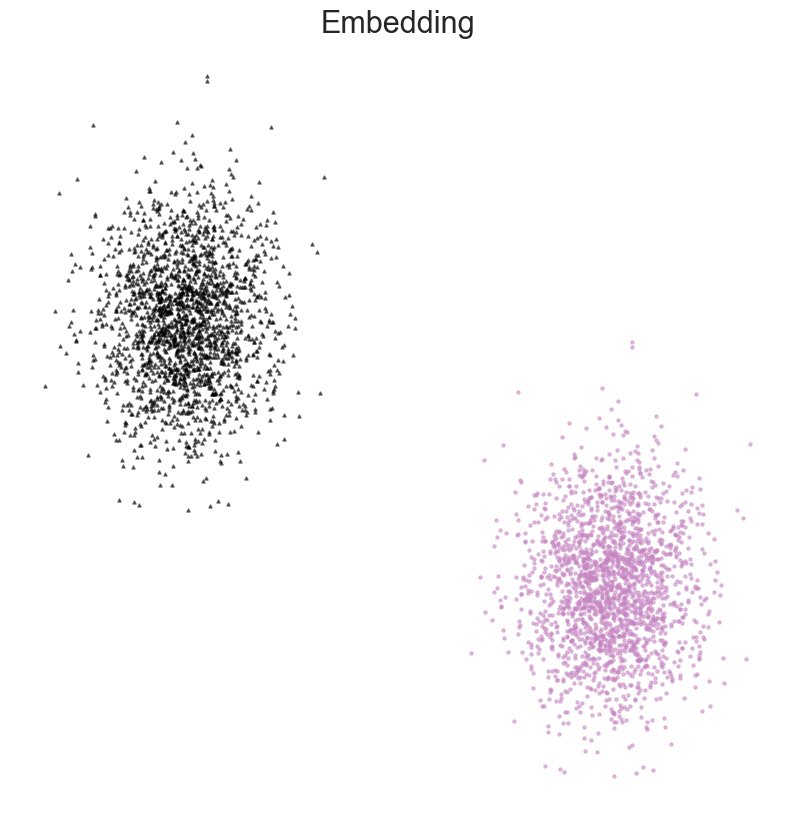

0.7988260851572557
Computing background and RR distributions: will be slower
Background factor 1
Number of valid bins:  99
Repley's K:  (np.float64(1.2412345050837923), np.float64(0.0))
Plotting


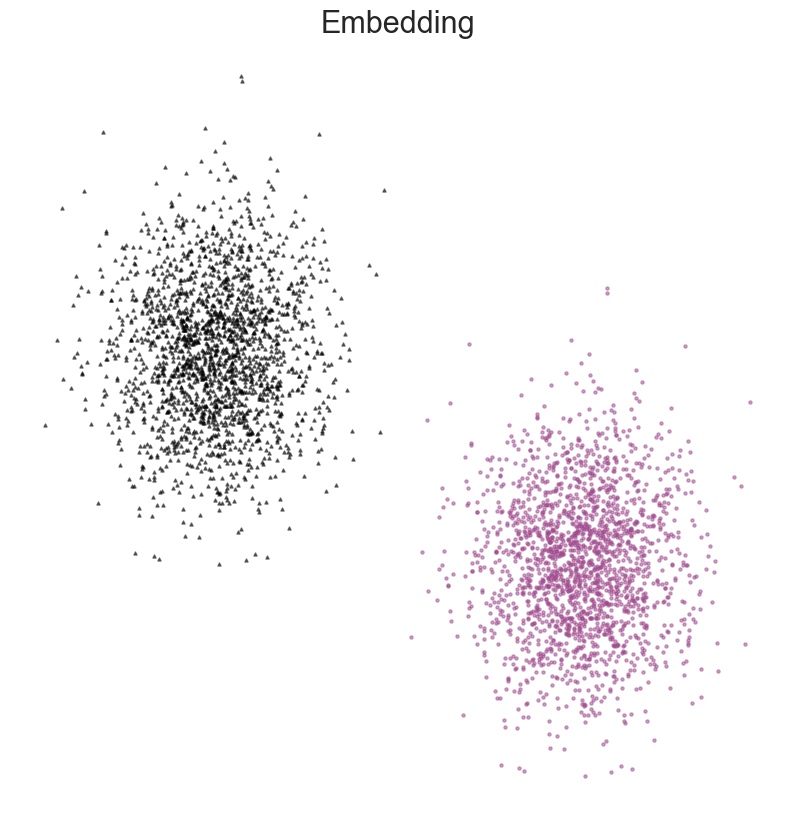

0.7737339900511814
Computing background and RR distributions: will be slower
Background factor 1
Number of valid bins:  99
Repley's K:  (np.float64(1.1962821043084637), np.float64(0.0))
Plotting


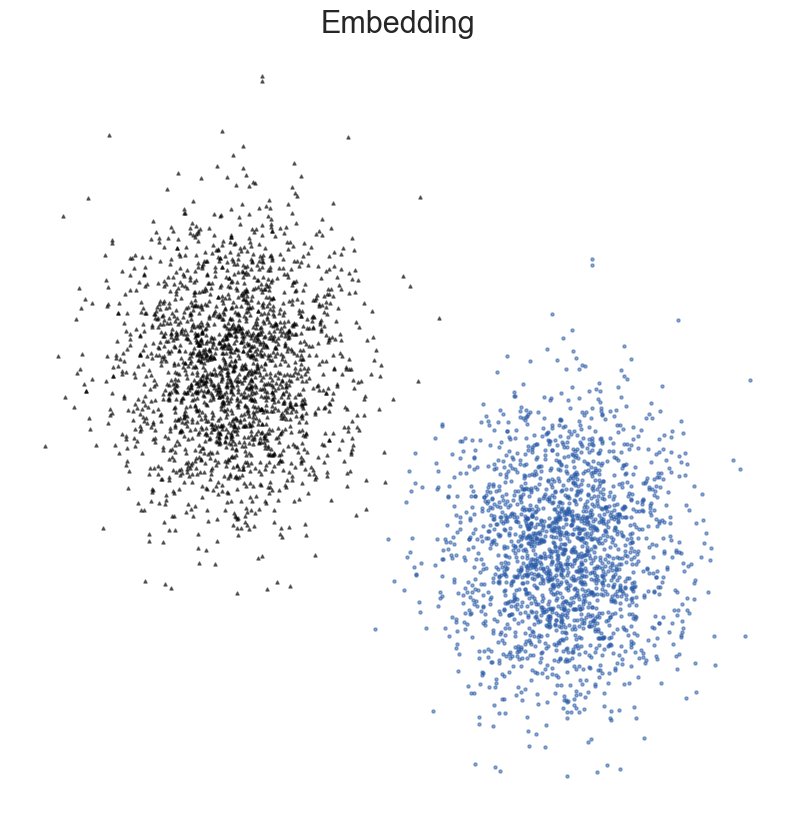

0.7537335501192151
Computing background and RR distributions: will be slower
Background factor 1
Number of valid bins:  99
Repley's K:  (np.float64(1.156466341092203), np.float64(0.0))
Plotting


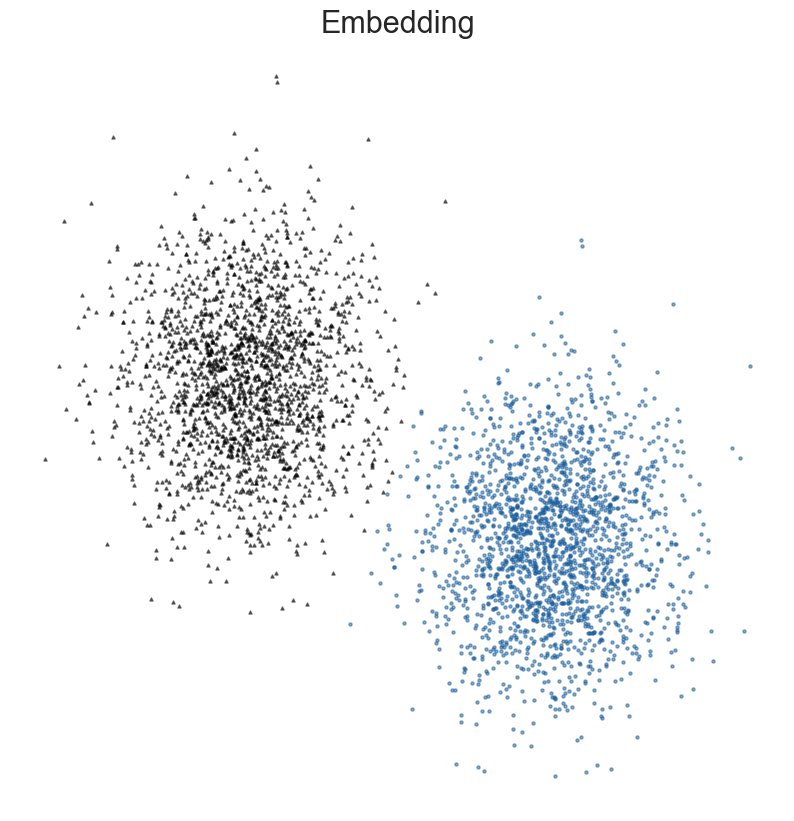

0.7382346233634318
Computing background and RR distributions: will be slower
Background factor 1
Number of valid bins:  99
Repley's K:  (np.float64(1.1239280526196935), np.float64(0.0))
Plotting


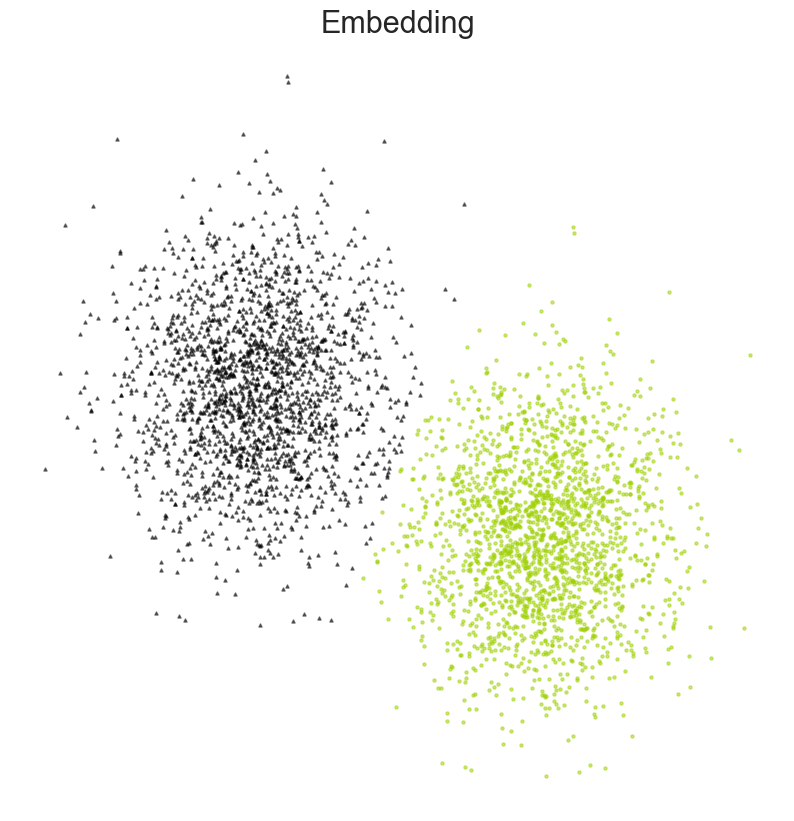

0.7258819350741489
Computing background and RR distributions: will be slower
Background factor 1
Number of valid bins:  99
Repley's K:  (np.float64(1.1033335297356155), np.float64(0.0))
Plotting


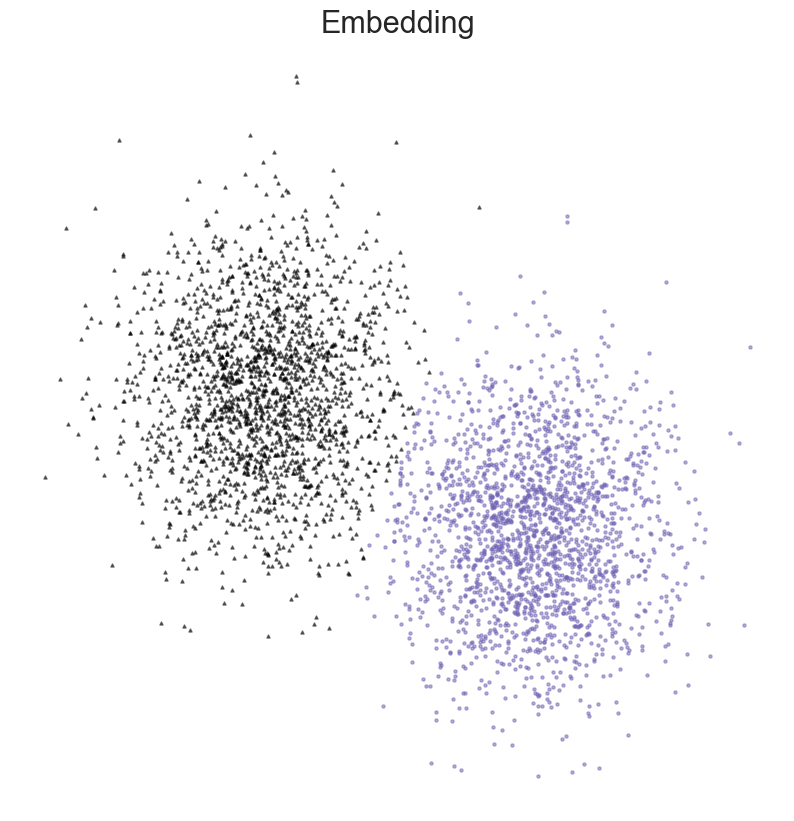

0.7077721379733588
Computing background and RR distributions: will be slower
Background factor 1
Number of valid bins:  99
Repley's K:  (np.float64(1.0677687234759112), np.float64(0.0))
Plotting


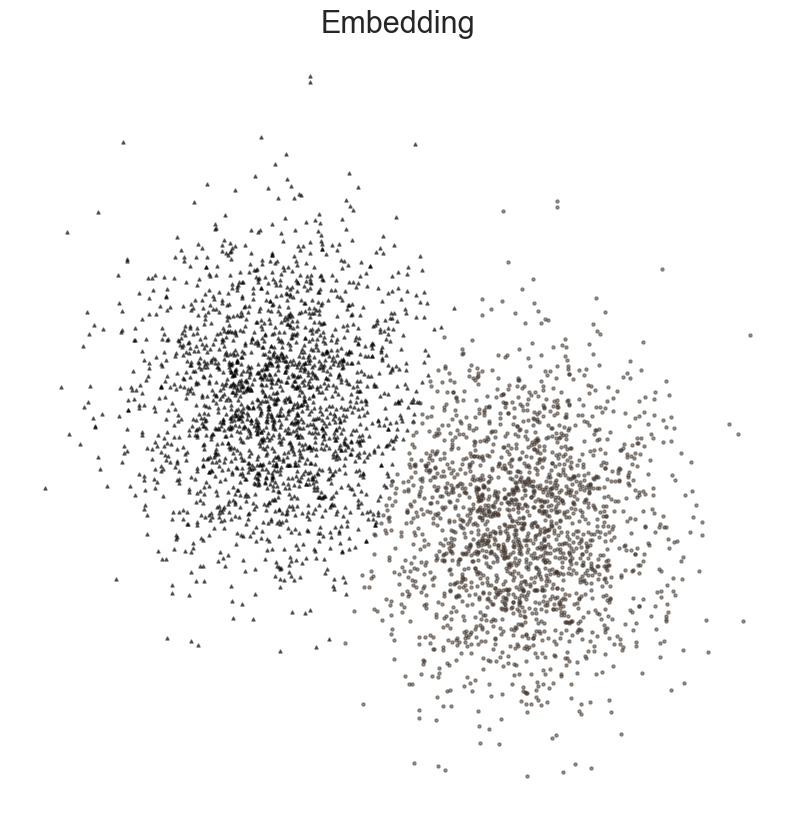

0.6997902739734045
Computing background and RR distributions: will be slower
Background factor 1
Number of valid bins:  99
Repley's K:  (np.float64(1.0555082027220652), np.float64(0.0))
Plotting


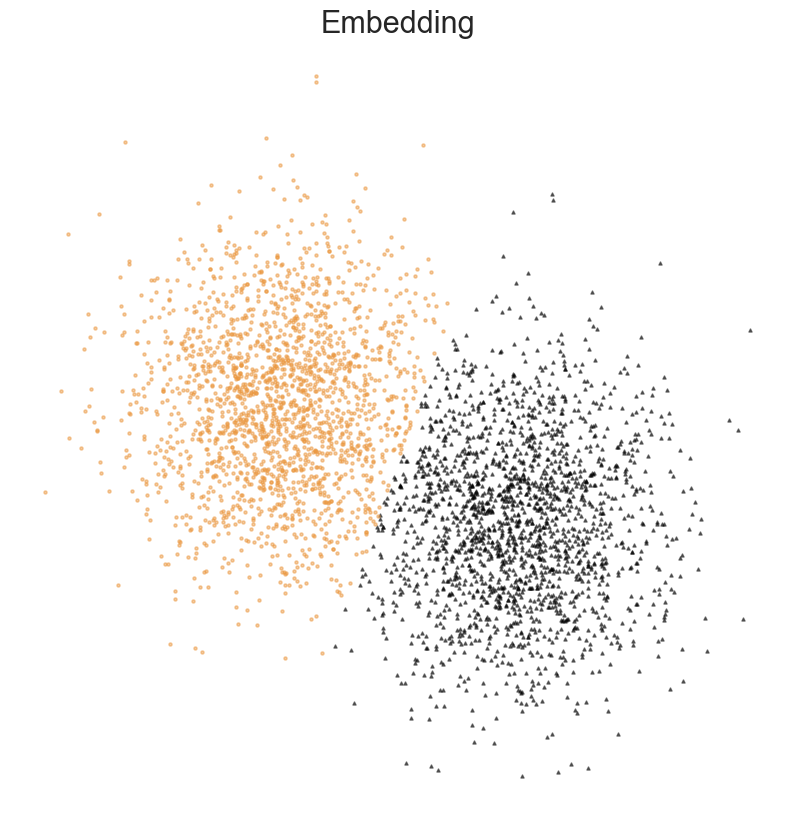

0.6963874029149288
Computing background and RR distributions: will be slower
Background factor 1
Number of valid bins:  99
Repley's K:  (np.float64(1.050817632188671), np.float64(0.0))
Plotting


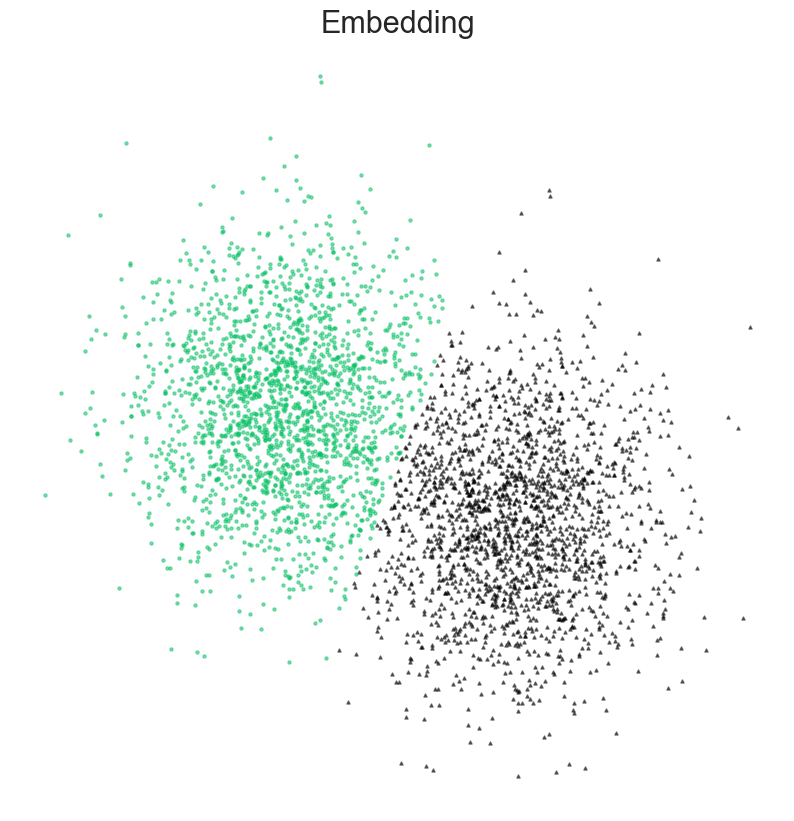

0.6828965194129073
Computing background and RR distributions: will be slower
Background factor 1
Number of valid bins:  99
Repley's K:  (np.float64(1.0371102631573719), np.float64(0.0))
Plotting


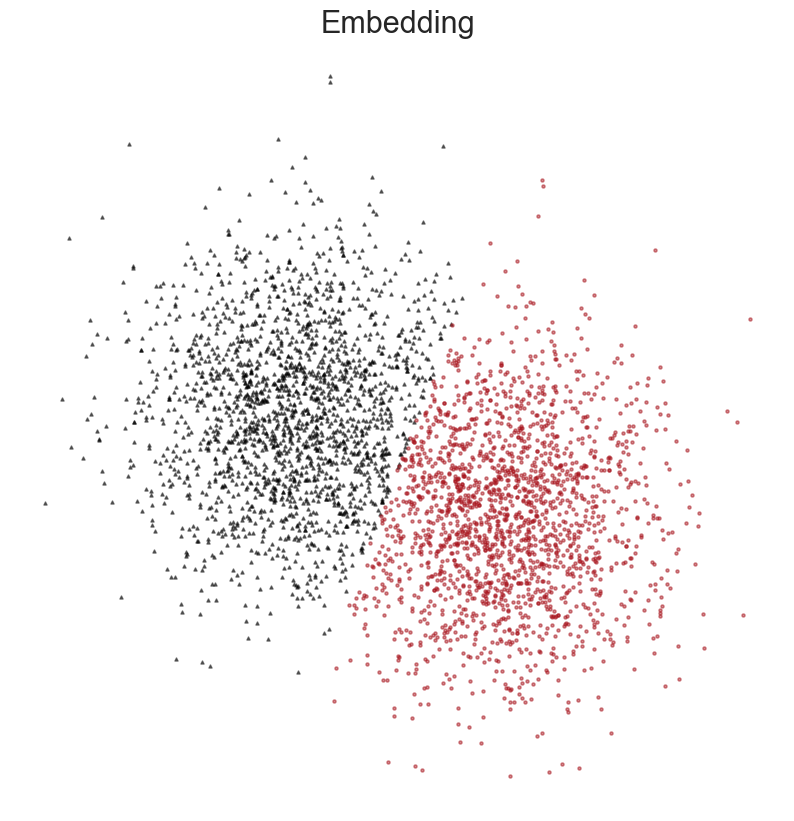

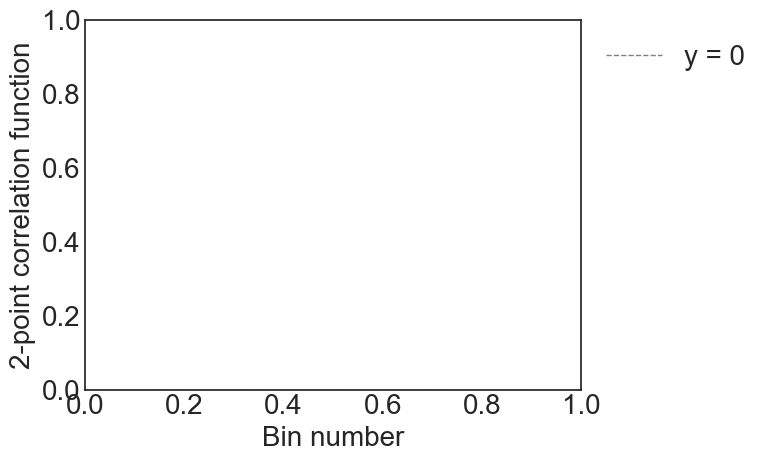

In [44]:
times_array = []
chi_scores = []
norm_scores = []
davies_scores = []
sim_scores = []

dimensions = 2  
mean_range = (-150, 150)
cov_range = (-10, 10)  
num_samples = 2
points_per_gaussian = 2000
n_points = points_per_gaussian*num_samples
structure = []
a = 100
b = 100
structure = []
labels = []
acc = []
importlib.reload(AstroMLmod)

cov_ranges  = [20,40,80,160,240,320,400,480,640,730,800,1000]

for i in range(num_samples):
    for item in range(points_per_gaussian):
        labels.append(i)
        
for cov_diagonal in cov_ranges:

    #obtain means within a range    
    means, _ = dist.sample_means_and_covariances(dimensions, mean_range, cov_range, num_samples, seed =42)
    
    covariances = dist.symmetric_covariance(cov_diagonal,
                                            dimension = dimensions)


    #Ceatures the feature space one cluster at a time from means and covariances
        
    gaussian_space = dist.generate_gaussian_points(mean = means[0]/2,
                                                   cov = covariances[0],
                                                   n_points =points_per_gaussian,
                                                   seed = 42)  # places cluster at position "mean"
    for mean in means[1:]:
            
        gaussian_space = np.concatenate((gaussian_space,
                                         dist.generate_gaussian_points(mean, covariances[0],points_per_gaussian,seed = 42)),
                                        axis = 0)

            
    gaussian_space = gaussian_space


    #clustering

    k_labels = dist.kmeans(gaussian_space,
                           n_clusters = 2)

        
    #plt.show()
    #scores
    
    davies_ = davies(gaussian_space,k_labels)
    val = test.KNN_accuracy(gaussian_space,labels)
    sim_score = viz.similarity_index(labels,k_labels)
    
    #dist.scatter_points(data_R, alpha = 0.10)


    timer = time.time()
    """
    corr, dcorr, NormScore = AstroMLmod.correlate_and_plot(gaussian_space, 
                                                              plot = True, 
                                                              background_factor = 1,
                                                               bin_number = 200,
                                                              return_corr = True)
    """
        
    corr, dcorr, NormScore = AstroMLmod.correlate_and_plot(gaussian_space,
                                                        min_dist = 0.0,
                                                        max_dist =1.5,
                                                        label = "Correlation on flat manifold for epoch:"+str(cov_diagonal),
                                                        fig_name = "plots/2PCR@Epoch: "+str(cov_diagonal),
                                                        precomputed_RR = None,
                                                        bin_number = 100,
                                                        method = "standard",
                                                        bootstrap  = True,
                                                        plot = False,
                                                        return_corr = True,
                                                        background_factor = 1,
                                                        representations = [])


    bins = np.logspace(np.log10(1), np.log10(100), 200)

    #metrics
    norm_scores.append(NormScore)
    acc.append(val)
    davies_scores.append(davies_)
    sim_scores.append(sim_score)



    viz.shade(predictions = k_labels,numof_class =len(means),embedded_dataset = gaussian_space,alpha = 0.5,size = 5)        


    if cov_range[0] in [0]:#[2.5,160,320,640]:
        line, = plt.plot(bins[1:],corr,
                             label = "COV[0]: "+ str(cov_range[0]))
        plt.fill_between(bins[1:],corr- dcorr, corr+dcorr, color = line.get_color(),alpha = .3)
    
plt.axhline(0, color='gray', linestyle='--', linewidth=1,label = "y = 0") 
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel("2-point correlation function")
plt.xlabel("Bin number")
plt.show()

# Plotting the  structure content

<Figure size 1920x1440 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

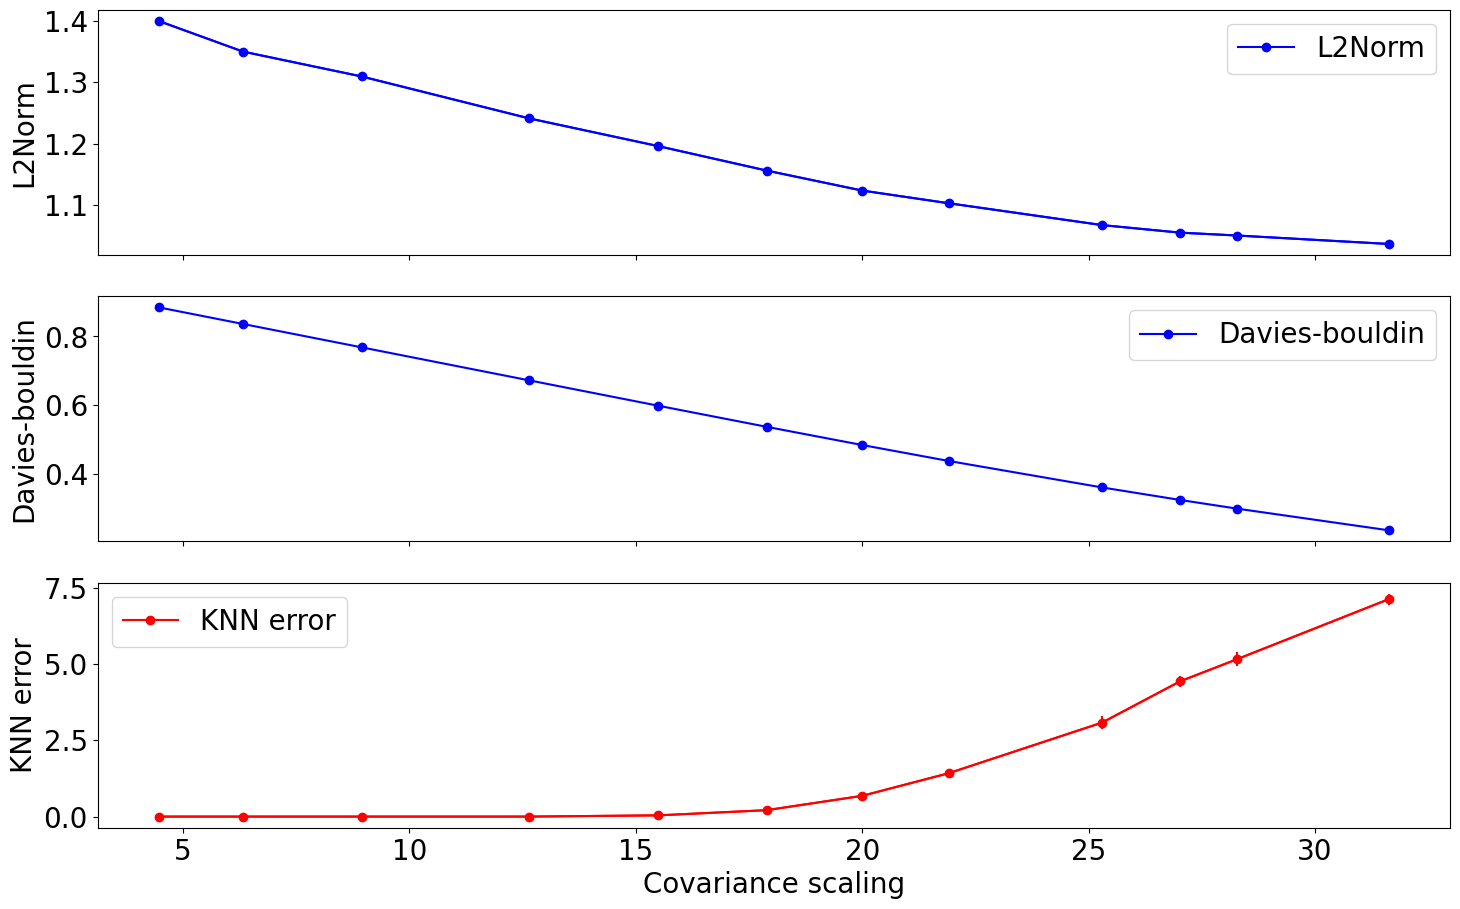

In [45]:
fig = plt.figure(dpi = 300)

plt.style.use("default")
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 20}) 
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(15, 10))


x = [np.sqrt(cov) for cov in cov_ranges]
yerr = np.array([b for a,b in norm_scores])
y = np.array([a for a,b in  norm_scores])
#plt.plot(x, y,color = "blue",marker = "o",alpha = 0.3)

#plt.errorbar(x, y, yerr = yerr, color = "blue",alpha = 1)

axs[0].plot(x, y,color = "blue",marker = "o",alpha = 1,label='L2Norm')

axs[0].errorbar(x, y, yerr = yerr, color = "blue",alpha = 1)

axs[0].set_ylabel('L2Norm')
axs[0].legend()


axs[1].plot(x, [1-a for a in davies_scores],color = "blue",marker = "o",alpha = 1,label='Davies-bouldin')


axs[1].set_ylabel('Davies-bouldin')
axs[1].legend()


axs[2].plot(x,[100-a for a,b in acc], marker = "o",alpha = 1,label='KNN error', color = "red")
axs[2].errorbar(x, [100-a for a,b in acc],yerr = [b for a,b in  acc], color = "red",alpha = 1)

axs[2].set_ylabel('KNN error')
axs[2].set_xlabel('Covariance scaling')
axs[2].legend()

# Add a global title
#fig.suptitle('Stacked Subplots with Shared X-axis', fontsize=16)
# Adjust spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show plot
plt.show()

In [ ]:
plt.title("K_100 with sub-sumpling error using uniform background (5X)")

axs[1].plot(epochs,[a for a,b in norm_scores], label='K_100')
axs[1].fill_between(epochs,[a-b/2 for a,b in norm_scores],[a+b/2 for a,b in norm_scores], color='green',alpha = 0.3)

axs[1].set_ylabel('K_100')
axs[1].legend()

axs[2].plot([100-a for a in train_scores], label='Train error')
axs[2].plot([100-a for a in validation_scores], label='Validation error')
axs[2].set_ylabel('Error')
axs[2].set_xlabel('x')
axs[2].legend()

# Add a global title
#fig.suptitle('Stacked Subplots with Shared X-axis', fontsize=16)

# Adjust spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show plot
plt.show()

In [114]:
np.logspace(np.log2(1),
            np.log2(5),
            10,
            base = 2)

array([1.        , 1.19581317, 1.42996915, 1.70997595, 2.04481177,
       2.44521285, 2.92401774, 3.49657893, 4.18125515, 5.        ])

<Figure size 1920x1440 with 0 Axes>

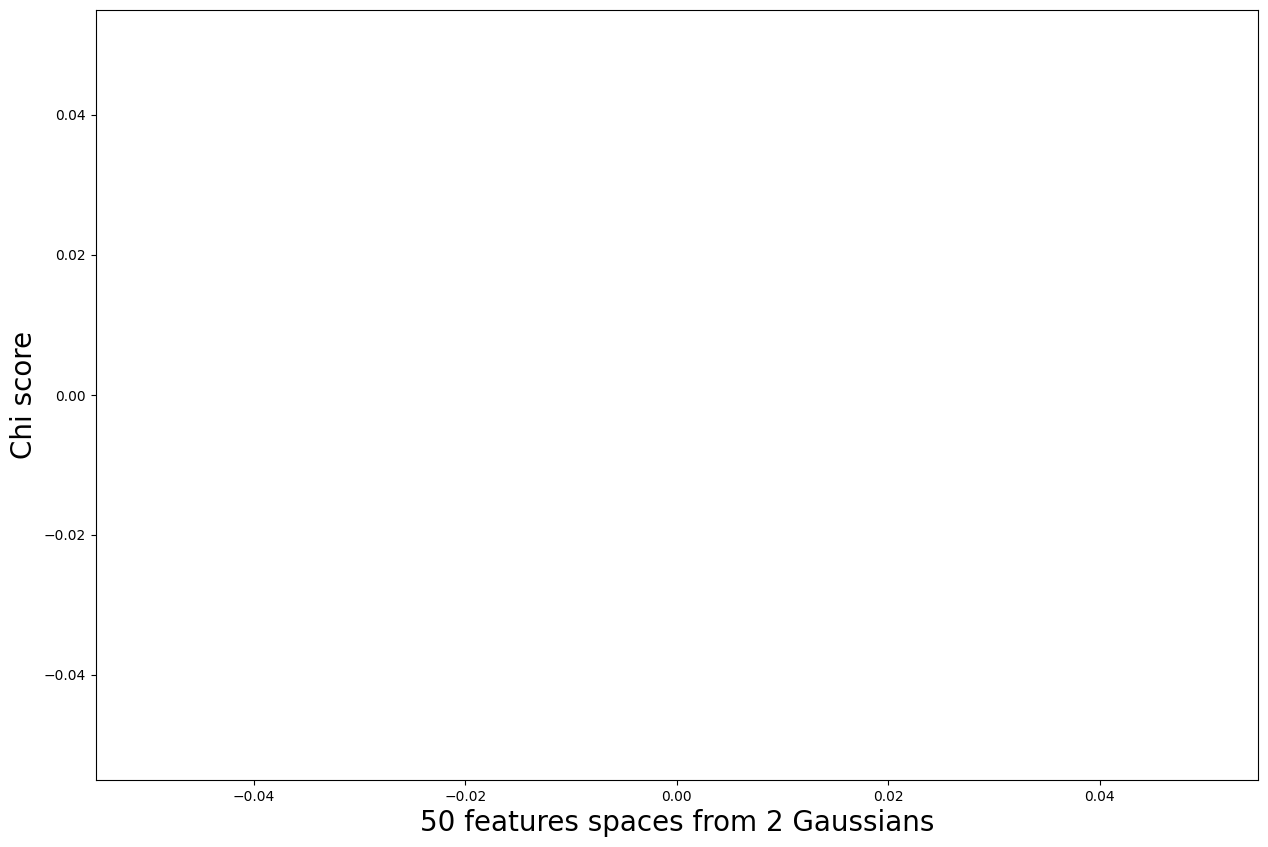

In [113]:
fig = plt.figure(dpi = 300)
plt.style.use("default")
plt.figure(figsize=(15,10))
plt.plot(chi_scores)
plt.ylabel("Chi score",fontsize = 20)
plt.xlabel("50 features spaces from 2 Gaussians",fontsize = 20)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (12,) and (0,)

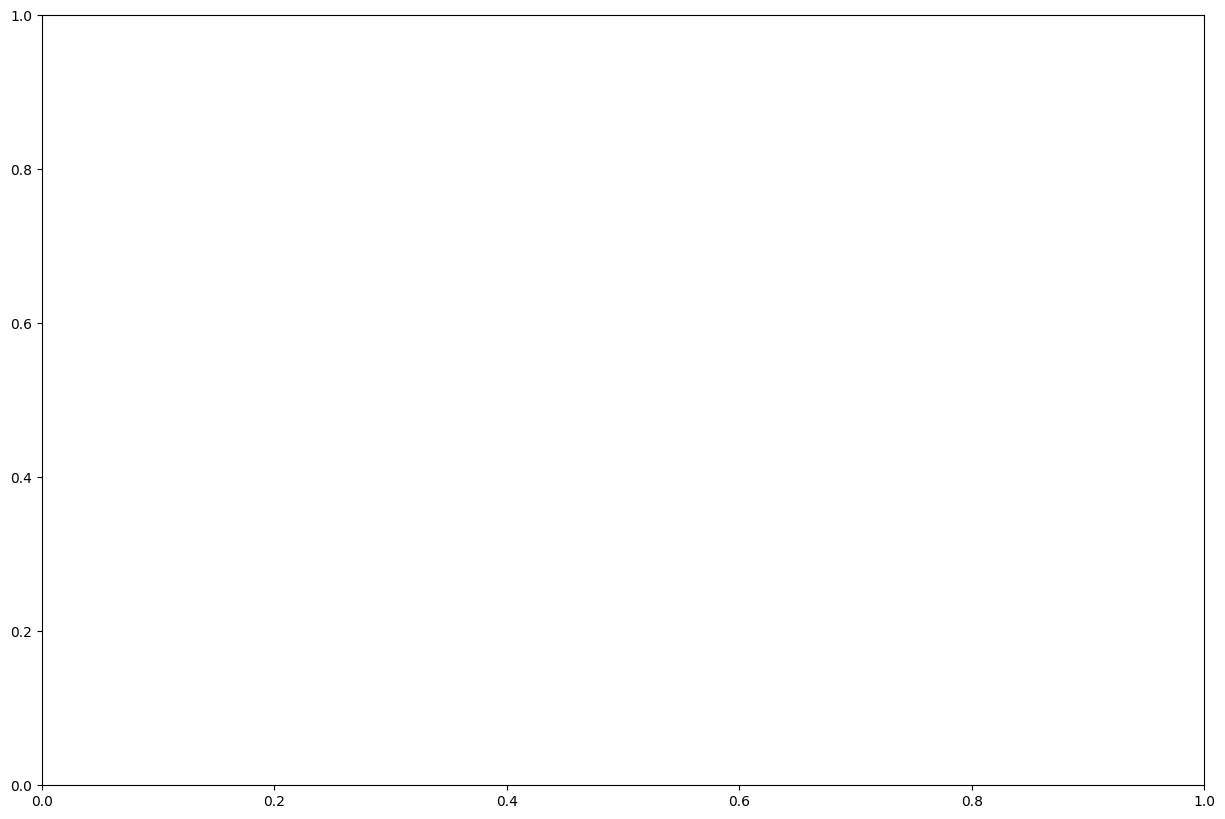

In [115]:
plt.figure(figsize=(15,10))

plt.plot(x, np.log(chi_scores),color = "blue",marker = "o",alpha = .8)
#plt.errorbar(x2, y2, yerr=yerr2, c = "blue")
plt.ylabel("log(chi-score)",fontsize = 20)
plt.xlabel("Spreadness (covariance)",fontsize = 20)
plt.xticks(np.linspace(0,160,9))
plt.show()

# Gaussian Zoo generator

## Cluster separation

0.9548047325295186
Computing background and RR distributions: will be slower
Background factor 1
Number of valid bins:  99
Repley's K:  (np.float64(2.052963474626362), np.float64(0.0))
Plotting


<Figure size 1920x1440 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

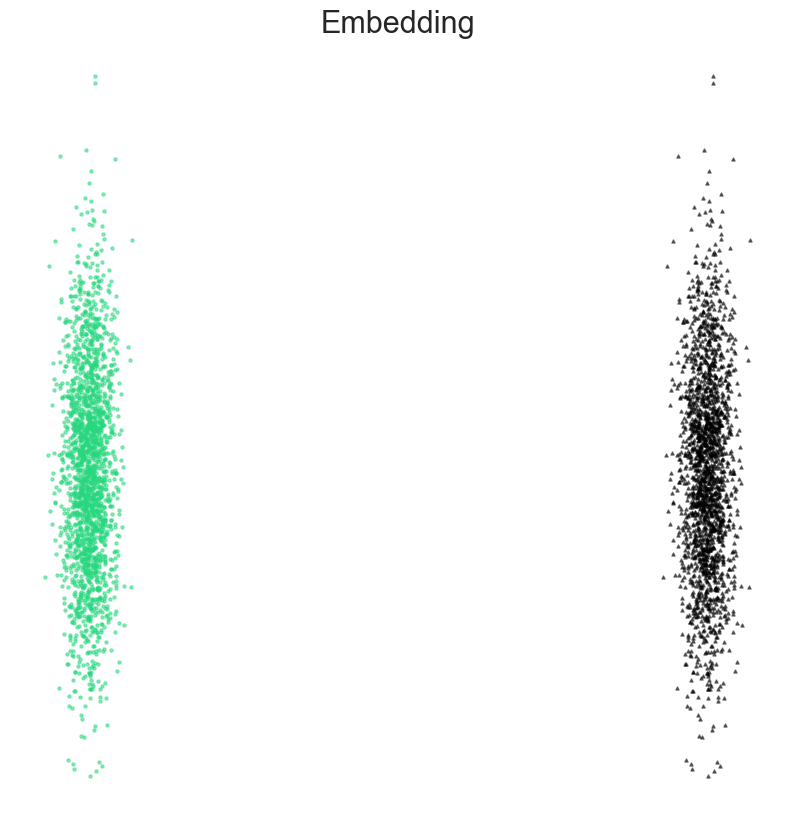

0.9180175727962699
Computing background and RR distributions: will be slower
Background factor 1
Number of valid bins:  99
Repley's K:  (np.float64(1.7528040784326726), np.float64(0.0))
Plotting


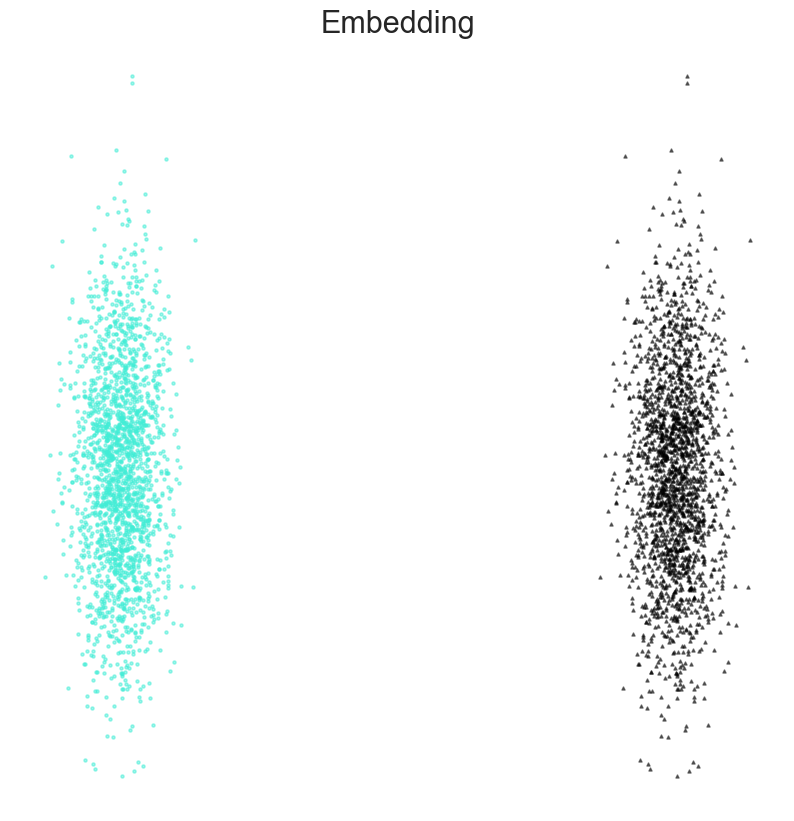

0.8995252719448141
Computing background and RR distributions: will be slower
Background factor 1
Number of valid bins:  99
Repley's K:  (np.float64(1.5747058162709857), np.float64(0.0))
Plotting


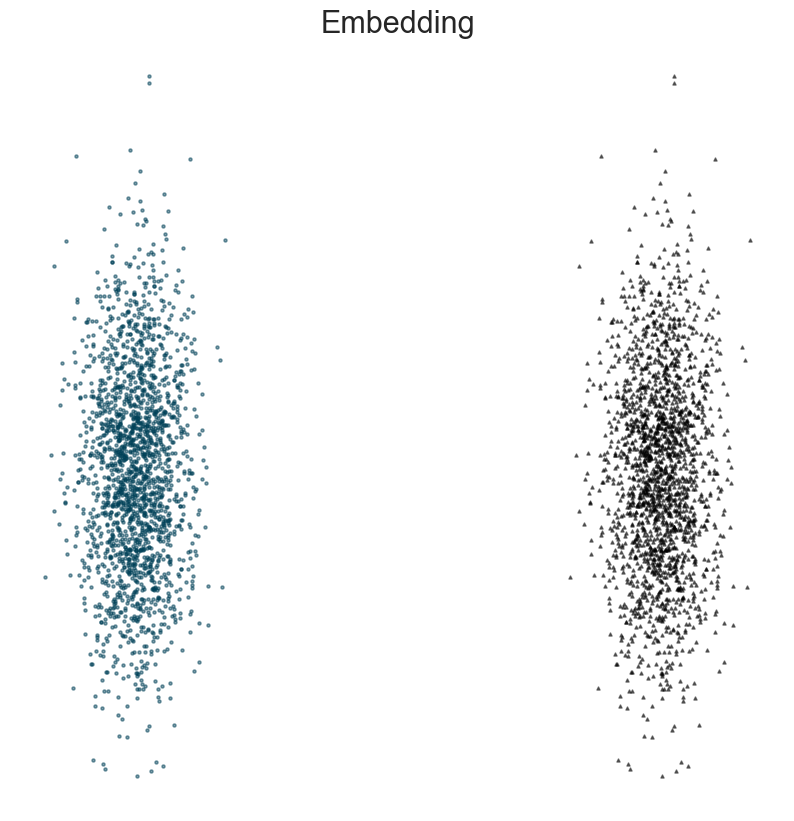

0.8745998967174883
Computing background and RR distributions: will be slower
Background factor 1
Number of valid bins:  99
Repley's K:  (np.float64(1.3778351570581941), np.float64(0.0))
Plotting


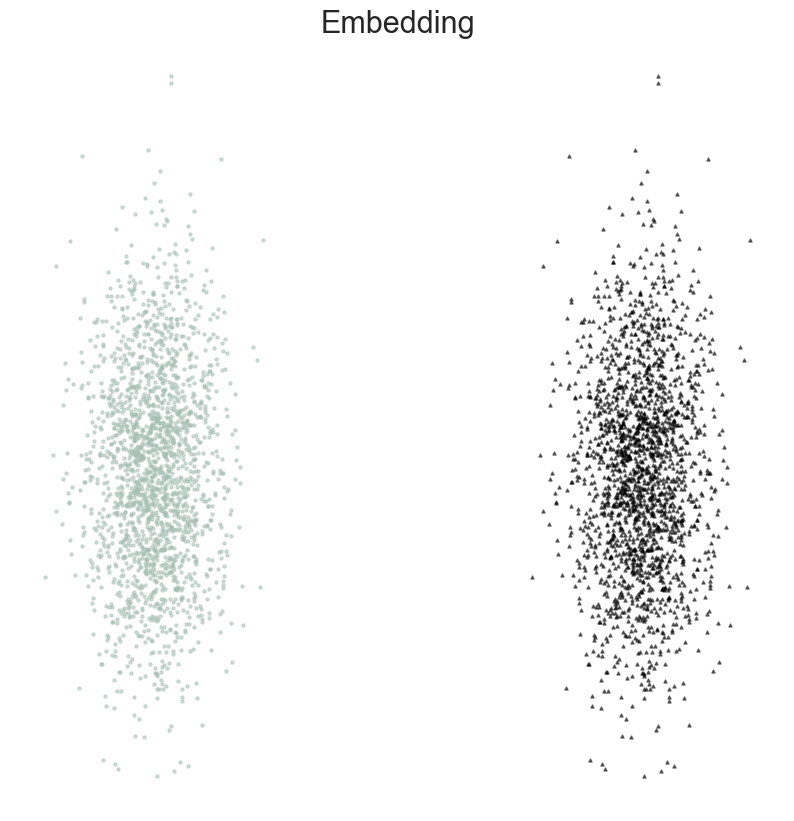

0.840839390039499
Computing background and RR distributions: will be slower
Background factor 1
Number of valid bins:  99
Repley's K:  (np.float64(1.086036924469292), np.float64(0.0))
Plotting


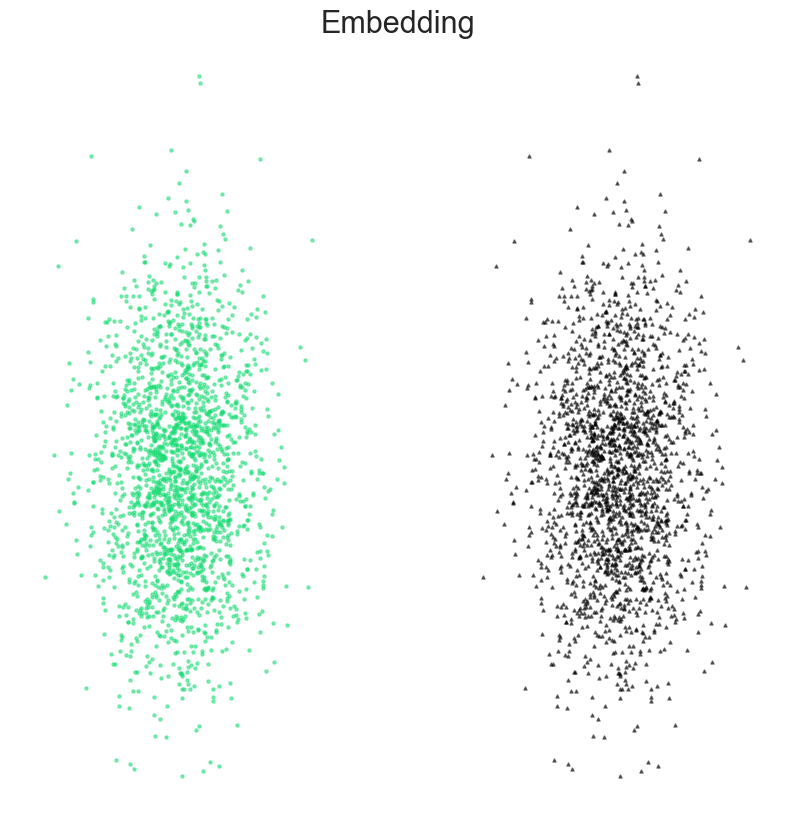

0.7955248978479172
Computing background and RR distributions: will be slower
Background factor 1
Number of valid bins:  99
Repley's K:  (np.float64(0.732449592429583), np.float64(0.0))
Plotting


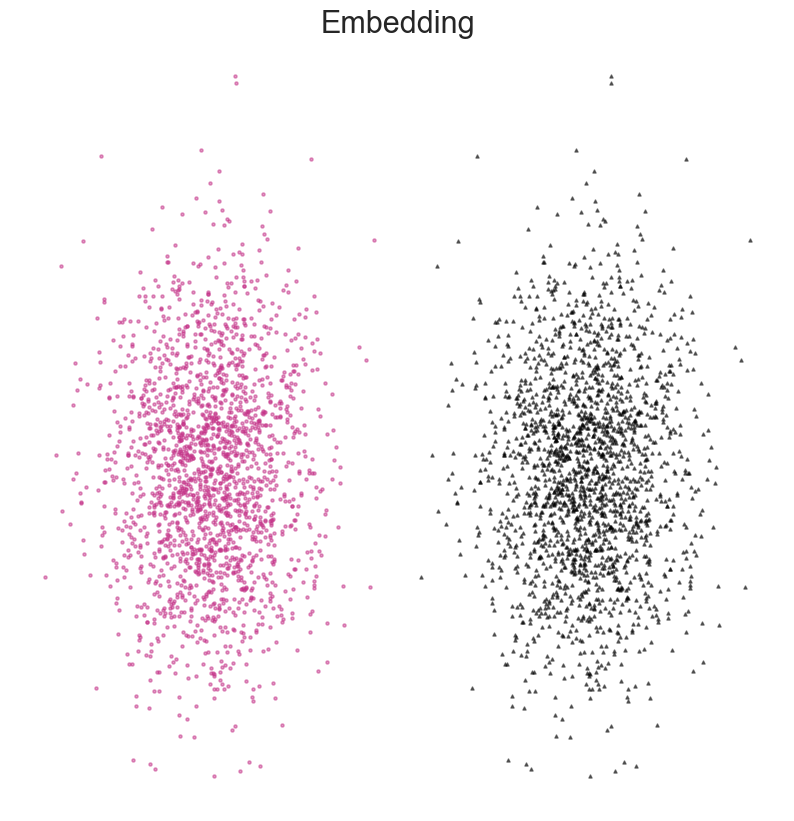

0.7354136255939004
Computing background and RR distributions: will be slower
Background factor 1
Number of valid bins:  99
Repley's K:  (np.float64(0.29660907864575864), np.float64(0.0))
Plotting


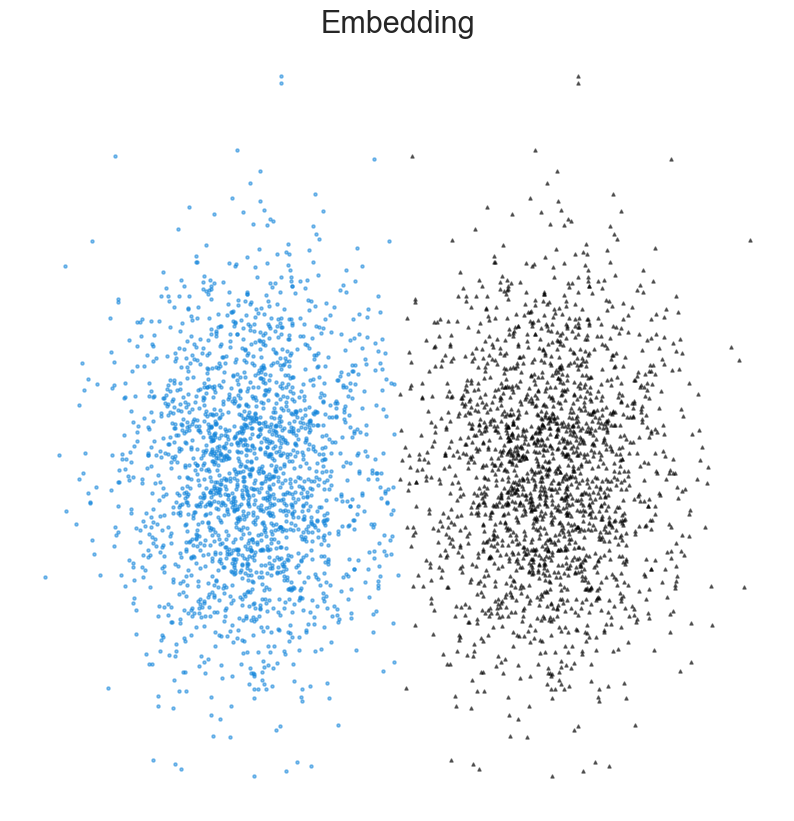

0.6715336891356335
Computing background and RR distributions: will be slower
Background factor 1
Number of valid bins:  99
Repley's K:  (np.float64(0.06858837445710675), np.float64(0.0))
Plotting


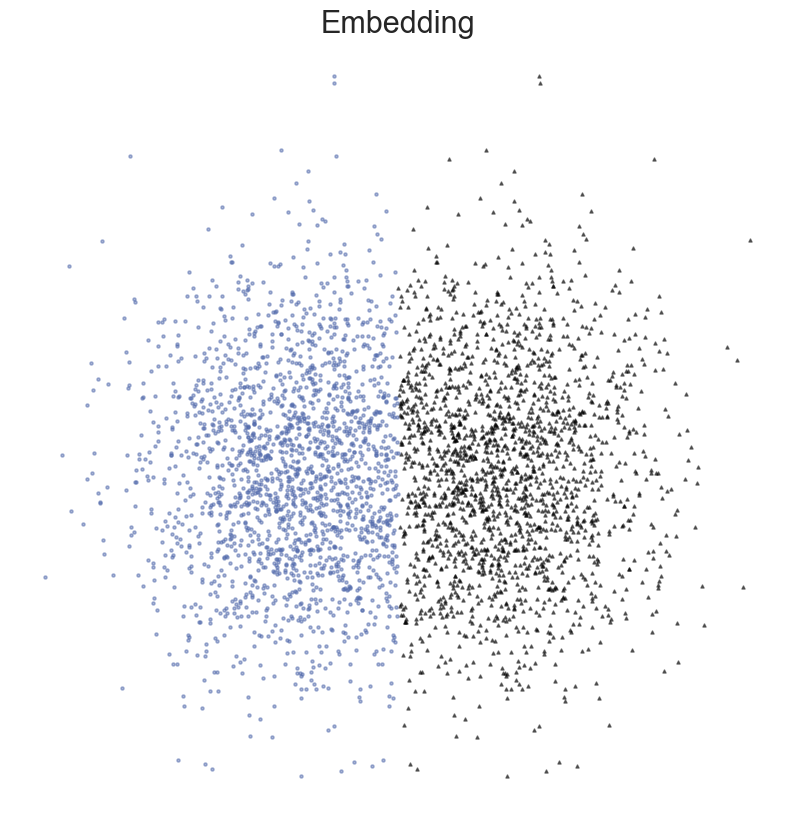

0.63417250600262
Computing background and RR distributions: will be slower
Background factor 1
Number of valid bins:  99
Repley's K:  (np.float64(0.00763585075912542), np.float64(0.0))
Plotting


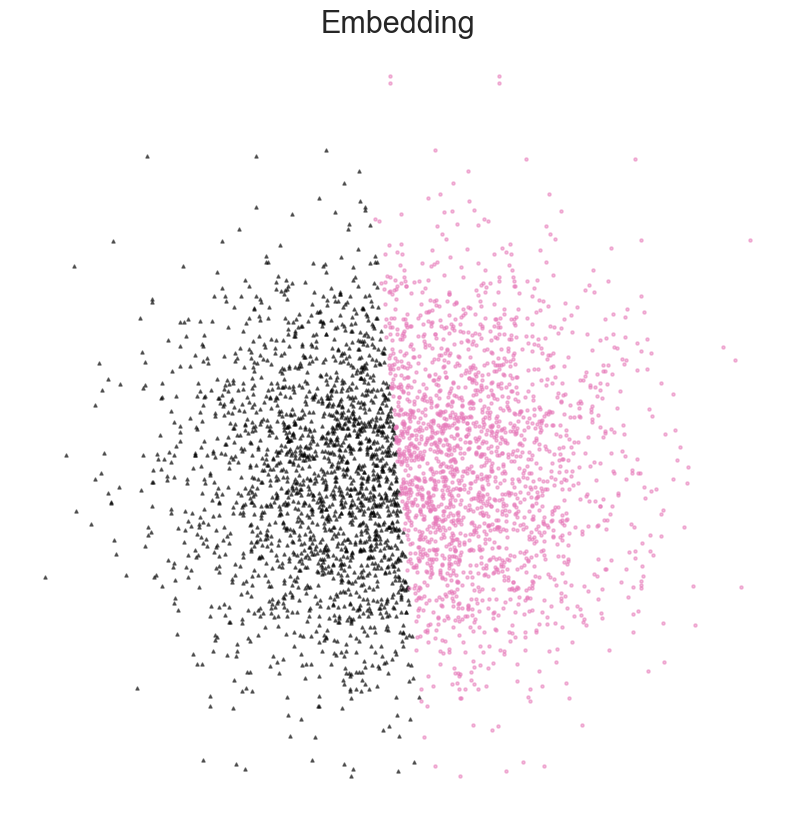

0.6411060915333737
Computing background and RR distributions: will be slower
Background factor 1
Number of valid bins:  99
Repley's K:  (np.float64(0.009559089641667358), np.float64(0.0))
Plotting


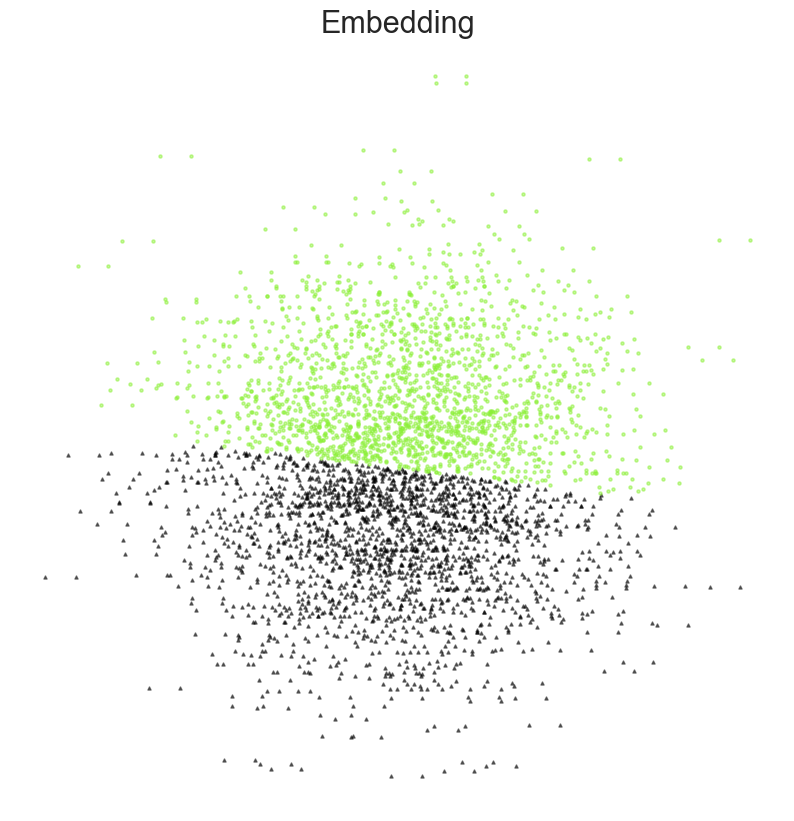

0.6439995691247863
Computing background and RR distributions: will be slower
Background factor 1
Number of valid bins:  99
Repley's K:  (np.float64(0.01283933041962093), np.float64(0.0))
Plotting


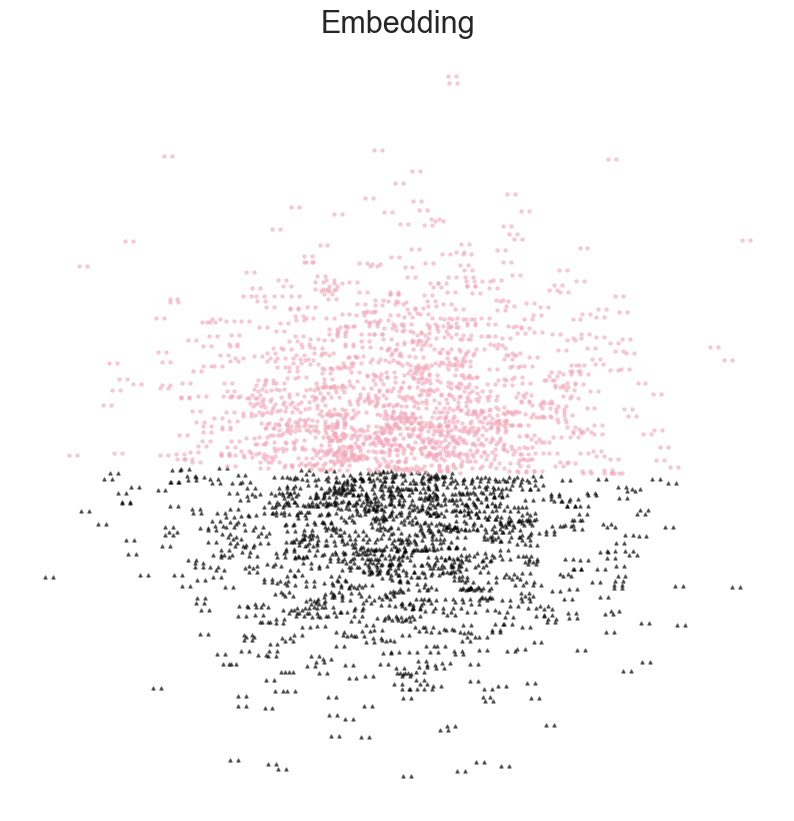

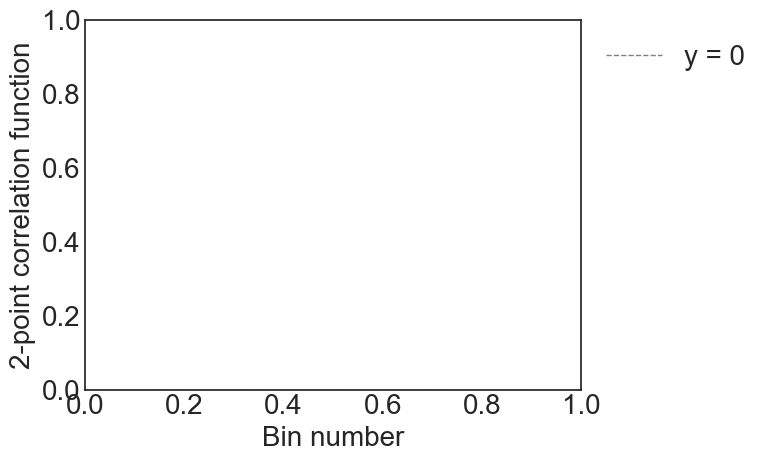

In [40]:
importlib.reload(dist)
importlib.reload(dist)
importlib.reload(AstroMLmod)


import numpy as np
fig = plt.figure(dpi = 300)
plt.style.use("default")
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 20})


cov_range = []
times_array = []
chi_scores = []
norm_scores = []
davies_scores =[]
acc = []
sim_scores = []


dimensions = 2  
mean_range = (-50, 50)
cov_range = (-10, 10)  
num_samples = 2 
points_per_gaussian = 2000
n_points = points_per_gaussian*num_samples
structure = []
a = 100
b = 100

cov_diagonal = 10
cov_range  = [5]
mean_separation =  [25,18,16,14,12,10,8,6,4,2,1]
labels = []


for i in range(num_samples):
    for item in range(points_per_gaussian):
        labels.append(i)

    


for separation in mean_separation:
    separation = separation**2
    
    means = np.array([[separation,0],[-separation,0]])
    
    #Ceatures the feature space one cluster at a time from means and covariances
        
    gaussian_space = dist.generate_gaussian_points(mean = means[0],
                                                   cov = covariances[0],
                                                   n_points =points_per_gaussian,
                                                   seed = 42)  # places cluster at position "mean"

    for mean in means[1:]:
            
        gaussian_space = np.concatenate((gaussian_space,
                                         dist.generate_gaussian_points(means[1], covariances[0],points_per_gaussian,seed = 42)),
                                        axis = 0)

            
    gaussian_space = gaussian_space


    #clustering

    k_labels = dist.kmeans(gaussian_space,
                           n_clusters = 2)

        
    #plt.show()
    #scores
    
    davies_ = davies(gaussian_space,k_labels)
    val = test.KNN_accuracy(gaussian_space,labels)
    sim_score = viz.similarity_index(labels,k_labels)
    
    #dist.scatter_points(data_R, alpha = 0.10)


    timer = time.time()
    """
    corr, dcorr, NormScore = AstroMLmod.correlate_and_plot(gaussian_space, 
                                                              plot = True, 
                                                              background_factor = 1,
                                                               bin_number = 200,
                                                              return_corr = True)
    """
        
    corr, dcorr, NormScore = AstroMLmod.correlate_and_plot(gaussian_space,
                                                        min_dist = 0.0,
                                                        max_dist =1.5,
                                                        label = "Correlation on flat manifold for epoch:"+str(cov_diagonal),
                                                        fig_name = "plots/2PCR@Epoch: "+str(cov_diagonal),
                                                        precomputed_RR = None,
                                                        bin_number = 100,
                                                        method = "standard",
                                                        bootstrap  = True,
                                                        plot = False,
                                                        return_corr = True,
                                                        background_factor = 1,
                                                        representations = [])


    bins = np.logspace(np.log10(1), np.log10(100), 200)

    #metrics
    norm_scores.append(NormScore)
    acc.append(val)
    davies_scores.append(davies_)
    sim_scores.append(sim_score)



    viz.shade(predictions = k_labels,numof_class =len(means),embedded_dataset = gaussian_space,alpha = 0.5,size = 5)        


    if cov_range[0] in [0]:#[2.5,160,320,640]:
        line, = plt.plot(bins[1:],corr,
                             label = "COV[0]: "+ str(cov_range[0]))
        plt.fill_between(bins[1:],corr- dcorr, corr+dcorr, color = line.get_color(),alpha = .3)
    
plt.axhline(0, color='gray', linestyle='--', linewidth=1,label = "y = 0") 
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel("2-point correlation function")
plt.xlabel("Bin number")
plt.show()

    

<Figure size 1920x1440 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

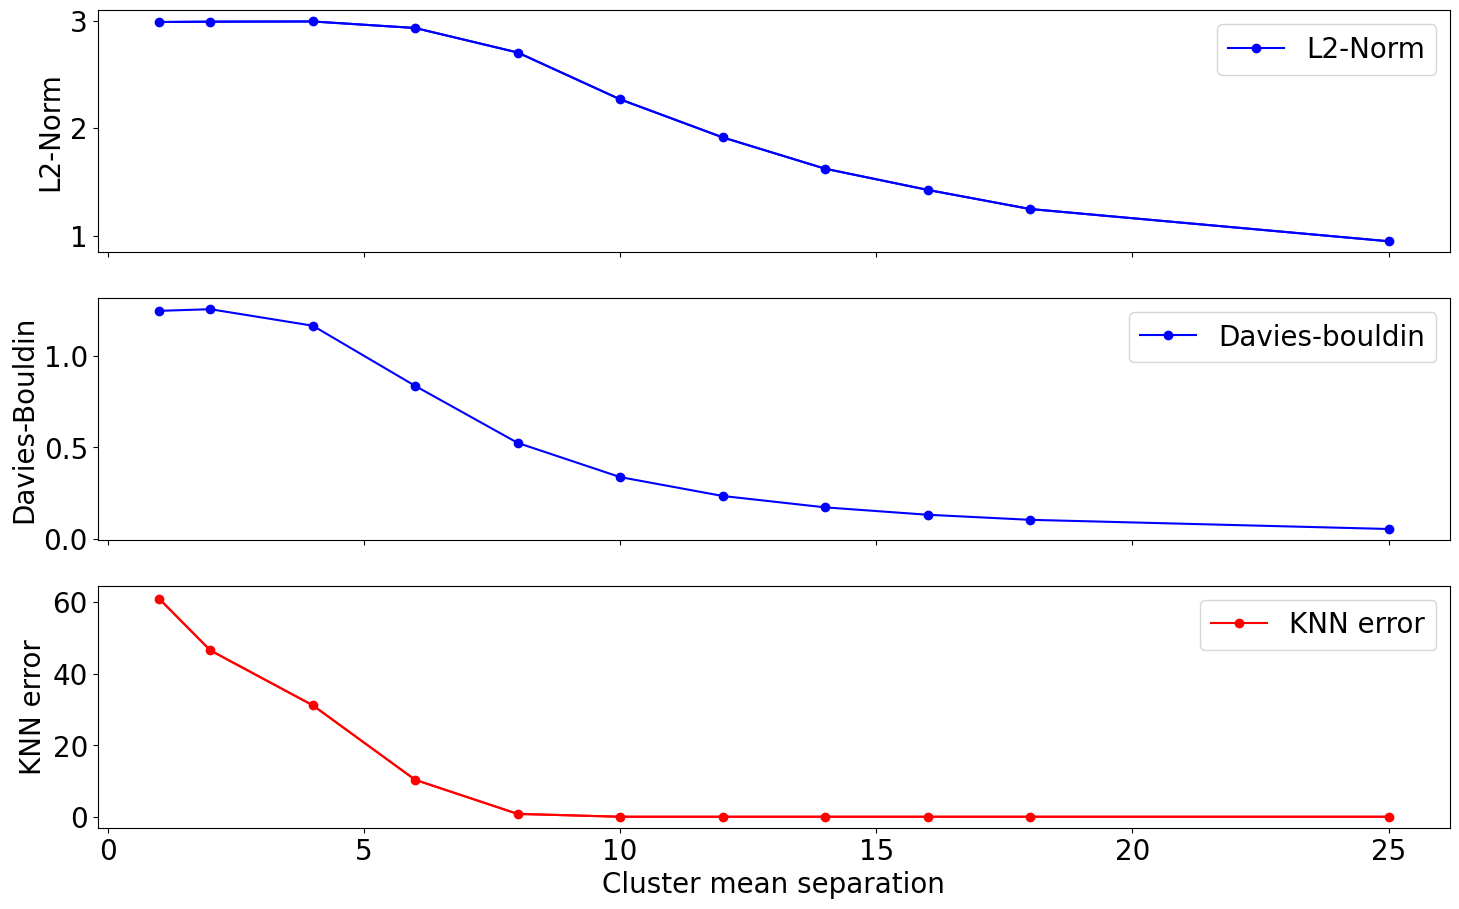

In [41]:
fig = plt.figure(dpi = 300)

plt.style.use("default")
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 20}) 
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(15, 10))


x = [sep for sep in  mean_separation]
yerr = np.array([b for a,b in norm_scores])
y = np.array([3-a for a,b in  norm_scores])

#plt.plot(x, y,color = "blue",marker = "o",alpha = 0.3)
#plt.errorbar(x, y, yerr = yerr, color = "blue",alpha = 1)

axs[0].plot(x, y,color = "blue",marker = "o",alpha = 1,label='L2-Norm')

axs[0].errorbar(x, y, yerr = yerr, color = "blue",alpha = 1)

axs[0].set_ylabel('L2-Norm')
axs[0].legend()


axs[1].plot(x, [a for a in davies_scores],color = "blue",marker = "o",alpha = 1,label='Davies-bouldin')


axs[1].set_ylabel('Davies-Bouldin')
axs[1].legend()


axs[2].plot(x,[100-a for a,b in acc], marker = "o",alpha = 1,label='KNN error', color = "red")
axs[2].errorbar(x, [100-a for a,b in acc],yerr = [b for a,b in  acc], color = "red",alpha = 1)

axs[2].set_ylabel('KNN error')
axs[2].set_xlabel('Cluster mean separation')
axs[2].legend()

# Add a global title
#fig.suptitle('Stacked Subplots with Shared X-axis', fontsize=16)
# Adjust spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show plot
plt.show()

ValueError: x and y must have same first dimension, but have shapes (11,) and (0,)

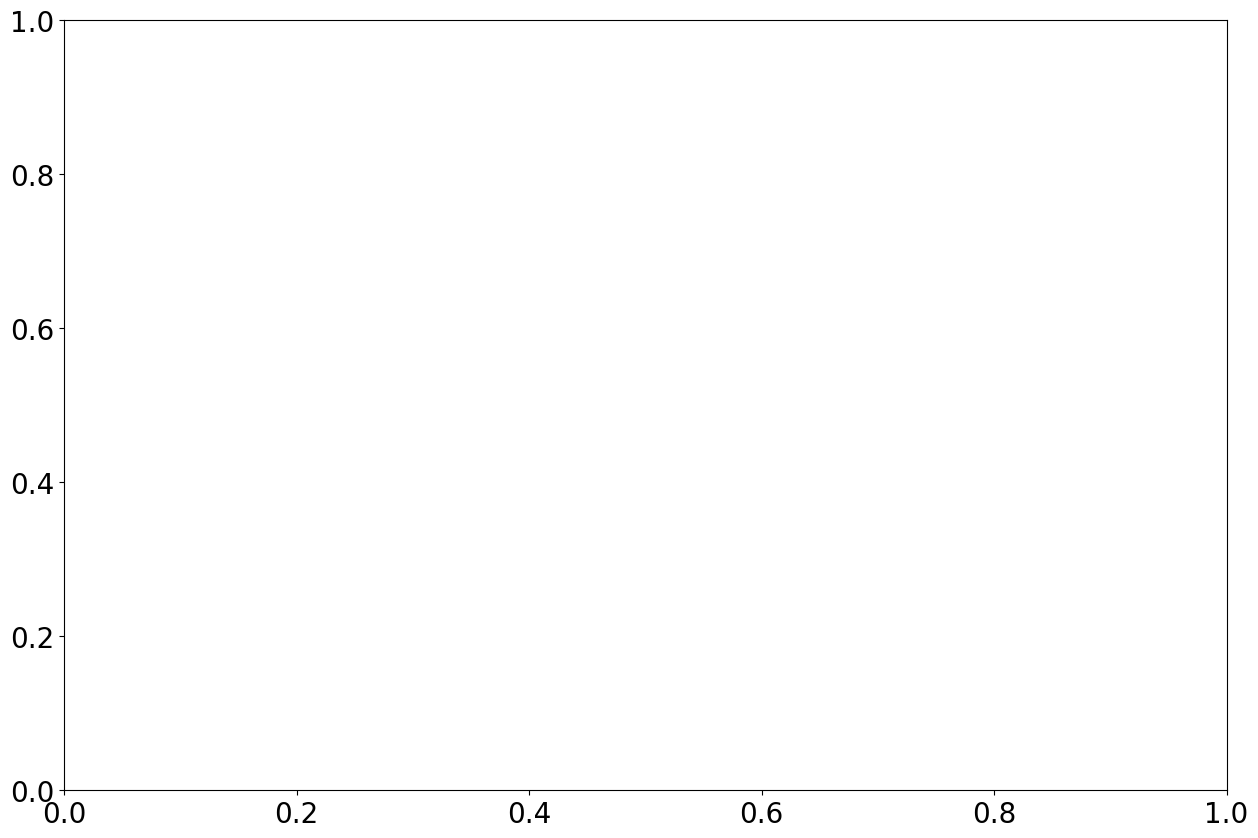

In [127]:
plt.figure(figsize=(15,10))
plt.plot(x, np.log(chi_scores),color = "blue",marker = "o",alpha = .8)
#plt.errorbar(x2, y2, yerr=yerr2, c = "blue")
plt.ylabel("log(chi-score)",fontsize = 20)
plt.xlabel("Mean separation)",fontsize = 20)
plt.xticks(np.linspace(0,10,10))
plt.show()

In [130]:
for bootstrap in bootstraps:
    plt.plot(bins[1:],bootstrap)



NameError: name 'bootstraps' is not defined

np.float64(0.4080251291283709)

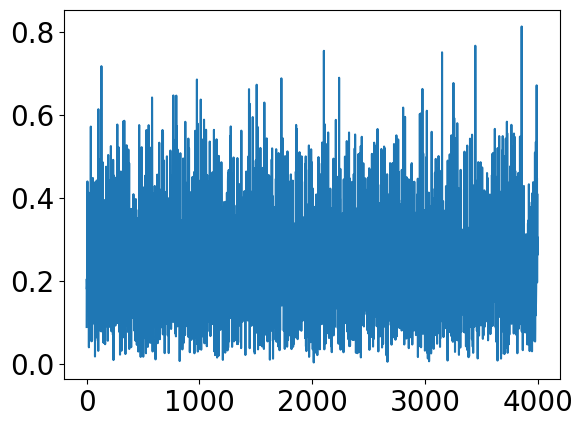

In [50]:
gaussian_space

mean = np.mean(gaussian_space,axis = 0)
distances = np.linalg.norm(gaussian_space-mean, axis=1)
plt.plot(distances)

d90 = np.percentile(distances, 99)

distances[-1]

In [9]:
fig = plt.figure(dpi = 300)
plt.style.use("default")
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 20}) 

a = 150
b = 100
bins = np.linspace(0, a, b )
#corr = two_point(gaussian_space , bins, method = 'landy-szalay')

timer = time.time()
corr, dcorr = bootstrap_two_point(gaussian_space, bins, Nbootstrap=5,method = 'landy-szalay')
import matplotlib.pyplot as plt

<Figure size 1920x1440 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [ ]:
plt.plot(np.ma.masked_invalid(corr), label = " 10 Gaussians")

#hist(corr)
#bins = np.linspace(0, a, b)
corr = two_point(uniform_points_disk , bins,method = 'landy-szalay')
#import matplotlib.pyplot as plt
plt.plot(corr, label = "Disk (diameter hundred)")
#hist(corr)

bins = np.linspace(0, a, b)
corr = two_point(uniform_points_square , bins, method  = 'landy-szalay')
import matplotlib.pyplot as plt
plt.plot(corr, label = "Square (100 by 100)")
#dist.plot_autocorrelation_2d(bins, corr,title = "Correlation")
#hist(corr)




plt.title("Landy-Szalay")
plt.legend()
plt.show()

In [18]:
from sklearn.utils import check_random_state
n_samples = 20000
indices = check_random_state(42).randint(0, n_samples, n_samples)
indices = list(indices)
count = 0
seen = []
for a in indices:
    if indices.count(a)>1 and a not in seen:
        count+=1
        seen.append(a)
        
print(count)

5267


## Chi-square distributions

Here I compute the reduced chi-square to quantify the structture in the function

$$\chi^2 = \frac{1}{N} \sum \frac{corr^2}{\sigma ^2}$$


In [66]:



structure.append(reduced_chi_square(observed =corr ,errors = dcorr))

16.59620108863754

## Experiment 1: How does this scale with datapoints?

In [199]:
cov_range = [(-5, 5),(-10, 10),(-15,15),(-20,20),(-25,25),(-30,30)]
data = {'Time stamp': times_array,
        'Cov_range': cov_range,
        'Structure_index':structure
      }


df = pd.DataFrame(data)

title = "Parameters of the Gaussians are: dimensions = 2 mean_range = (0 -100), num_samples = 1000*20 "

# Write to CSV with a title
with open('covariance_nonchi_square.csv', 'w') as f:
    f.write(title + '\n')  # Add the title
    df.to_csv(f, index=False)  # Write DataFrame to CSV without index

In [200]:
df = pd.read_csv('covariance_nonchi_square.csv', skiprows = 1)
df            

,Time stamp,Cov_range,Structure_index
0,151.900244,"(-5, 5)","(0.1253484173586041, 2.6897082354960644)"
1,170.162937,"(-10, 10)","(0.08406057528042993, 0.6890739495126141)"
2,180.707930,"(-15, 15)","(0.022571507974236085, 0.23799901133369677)"
3,190.663771,"(-20, 20)","(0.004301938166512209, 0.08441362227409019)"
4,198.190400,"(-25, 25)","(0.0010481882475334486, 0.01676076627155966)"
5,198.768602,"(-30, 30)","(0.0013268879790020688, 0.016789833151431108)"


<Figure size 1920x1440 with 0 Axes>

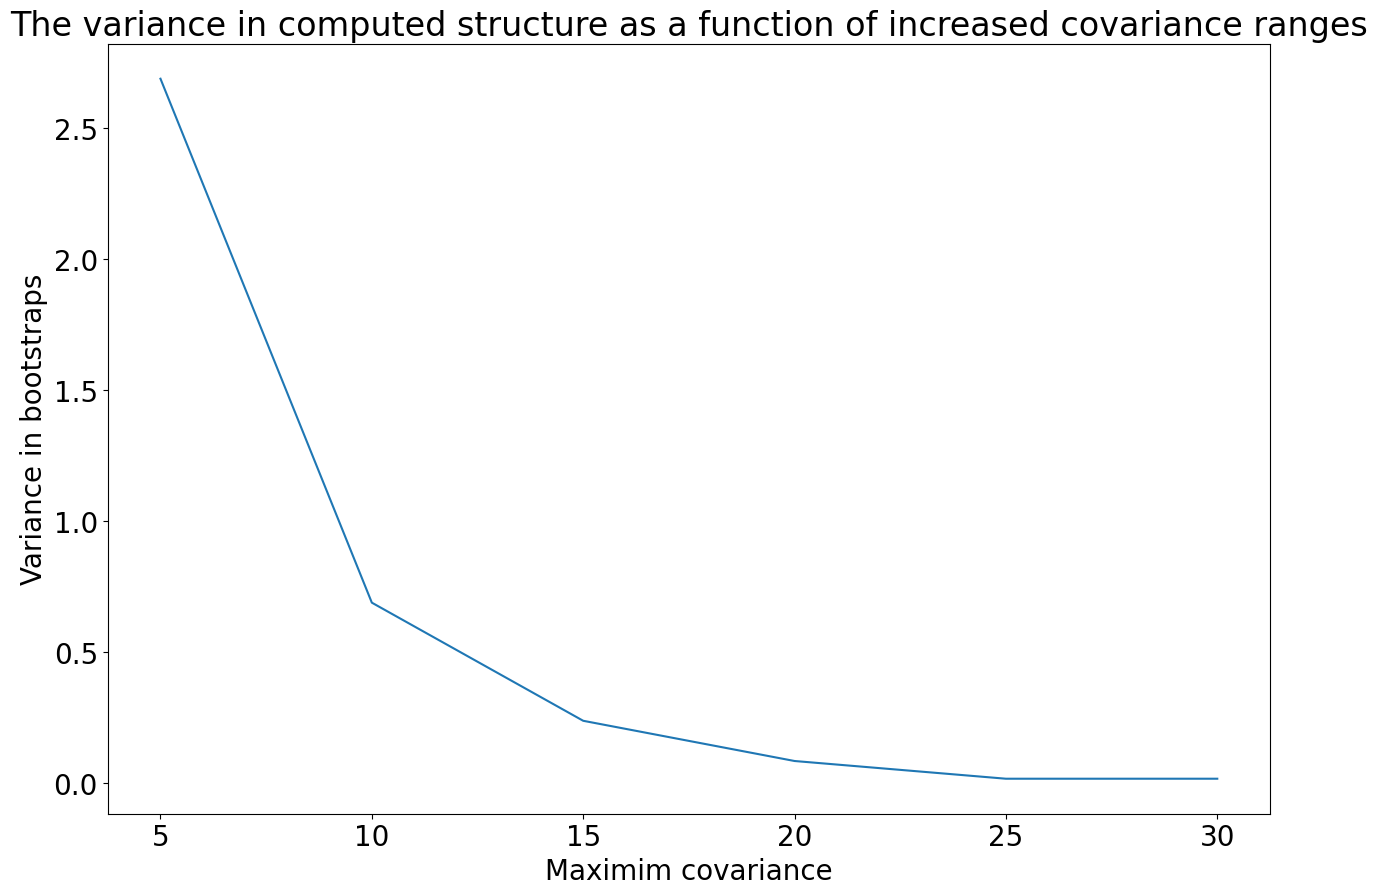

In [196]:
fig = plt.figure(dpi = 300)
plt.style.use("default")
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 20}) 


tag = "Time stamp"
plt.plot([5,10,15,20,25,30],[b for a,b in structure], label = "Time in seconds")
#plt.plot(df["Numper of points per gaussian"],df["Structure_index"], label = "Structure index")
plt.xlabel("Maximim covariance")
plt.ylabel("Variance in bootstraps")
plt.title("The variance in computed structure as a function of increased covariance ranges")
plt.show()

In [ ]:
title = "Parameters of the Gaussians are: dimensions = 2 mean_range = (0 -100) cov_range = (-10 -  10) num_samples = 10 "
df

In [61]:
A = 1000

for i in range(5*12):
    A+=1000
    A += A*(0.71/100)    ##Average return rate
A

76539.02971037827

In [70]:
return_ = (630 - 10*20*2)*60

(10*20*2*60)/365

65.75342465753425